This notebook calculates spectral-angular distribution of the number of photons emitted by a single electron in the undulator per one pass

In [1]:
import numpy as np
from wigrad import Wiggler, WigglerRadiationSimulator

https://accelconf.web.cern.ch/e04/PAPERS/THPKF005.PDF

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5929359/

https://inis.iaea.org/collection/NCLCollectionStore/_Public/36/041/36041296.pdf?r=1&r=1

https://www.ph.unimelb.edu.au/~djpeake/djp_thesis.pdf

https://inis.iaea.org/collection/NCLCollectionStore/_Public/33/034/33034307.pdf?r=1&r=1

https://accelconf.web.cern.ch/e08/papers/tupc010.pdf  single bunch current up to 10 mA

In [16]:
Ku = 1.75
lamu = 22e-3
gamma = 3e9/0.511e6
lam1 = lamu/gamma**2*(1+Ku**2/2)
sx = 387e-6
sy = 20e-6
sxp = 41e-6
syp = 8e-6
sz = 9.84e-3
Nu = 3/lamu
skrel = 0.1/Nu
sk = skrel*2*np.pi/lam1
Ml = 2*sk*sz
T = 2.16/3e8
Imax = 10e-3
Ne = Imax*T/1.6e-19
avN = np.pi/2*1/137*Nu*Ne*skrel*np.sqrt(2*np.pi)
usx = 1/gamma*np.sqrt((1+Ku**2/2)/Nu)
k0 = 2*np.pi/lam1
M = 8*sk*sz*k0**2*usx**2*sx*sy
Ne, Ml, avN, usx, M

(450000000.00000006,
 56124.09826534819,
 1293307.3860538483,
 2.3206939964157275e-05,
 14152455.504822502)

In [11]:
lam1

1.6156861875e-09

In [54]:
wiggler = Wiggler(K_peak=Ku, N_periods=Nu, lambda_wiggler_m=lamu)
x_max = 3*1/gamma/np.sqrt(Nu)  # rad
y_max = x_max  # rad
n_x = 400  # after using symmetries the size will be twice that
n_y = 400  # after using symmetries the size will be twice that
n_l = 100
l_min = lam1-3*sl  # um
l_max = lam1+3*sl  # um
x_step = x_max/(n_x-1)
y_step = y_max/(n_y-1)
l_step = (l_max-l_min)/(n_l-1)
# this mesh is only for positive theta_x and theta_y, the results will be extended later using symmetries (two mirror symmetries: along y-axis and along x-axis)
mesh = (np.linspace(x_step/2, x_max, n_x),
        np.linspace(y_step/2, y_max, n_y),
        np.linspace(l_min, l_max, n_l))

wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=gamma,
    harmonics=[1],  # harmonics to be calculated have to be specified
    aperture=None,  # as of now the only other option is 'ellipse'
    spectral_transmission=np.exp(-1/2/sl**2*(np.linspace(l_min, l_max, n_l)-lam1)**2)  # you can provide transmission of filters, QE of detector here, 1D array of the same length as the wavelengths array
    )

In the cell below, spectral-angular distribution of the number of emitted photons is calculated on the mesh with postive $\theta_x$ and $\theta_y$ only (one quarter).

In [55]:
wr_sim.calc_amplitude_on_meshgrid()

Below the results calculated only in the quarter with postive $\theta_x$ and $\theta_y$ are extended to all four quarters. Note that the meshgrid for $\theta_x$, $\theta_y$ is extended too (the attributes x_range, y_range, x_2D, y_2D of wr_sim).

In [56]:
wr_sim.extend_results_using_symmetries()

The results calculated on the 3D mesh can be obtained by
`wr_sim.get_photon_flux_3D(polarization)`, where `polarization` can be 'x', 'y', or 'sum'. Meshgrid for $\theta_x$ and $\theta_y$ can be obtained by `wr_sim.x_2D` and `wr_sim.y_2D`, respectively.

To get the numeric data for the plots below, replace 'show' by 'get'. For exampple, replace
`wr_sim.show_angular_distribution(polarization='x', index_of_lambda=14)` by `wr_sim.get_angular_distribution(polarization='x', index_of_lambda=14)`

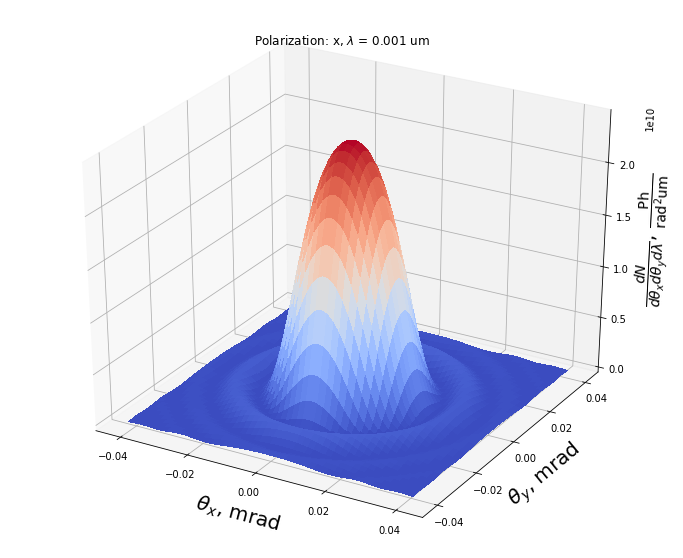

In [57]:
wr_sim.show_angular_distribution(polarization='x', index_of_lambda=14)

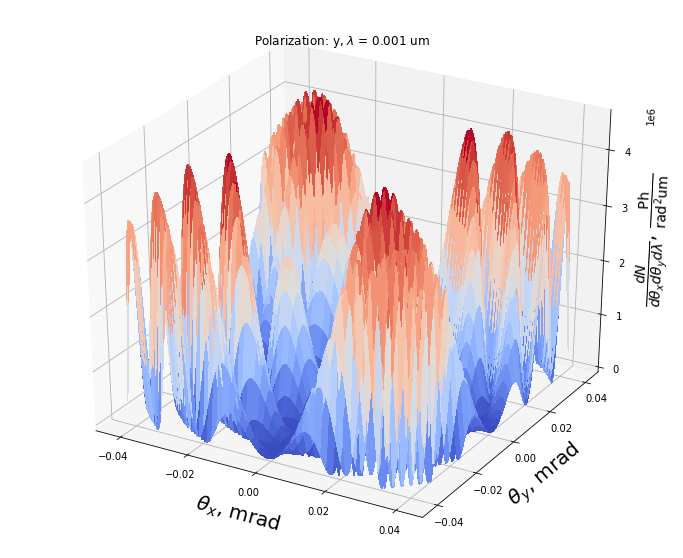

In [58]:
wr_sim.show_angular_distribution(polarization='y', index_of_lambda=14)

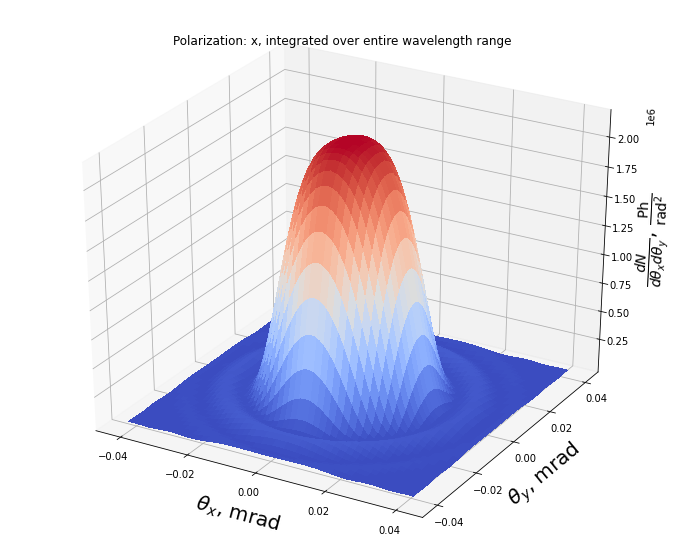

In [59]:
wr_sim.show_angular_distribution(polarization='x')

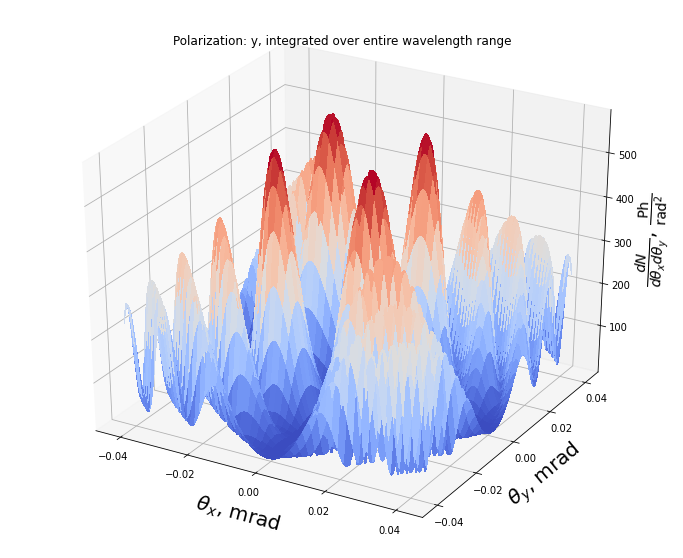

In [60]:
wr_sim.show_angular_distribution(polarization='y')

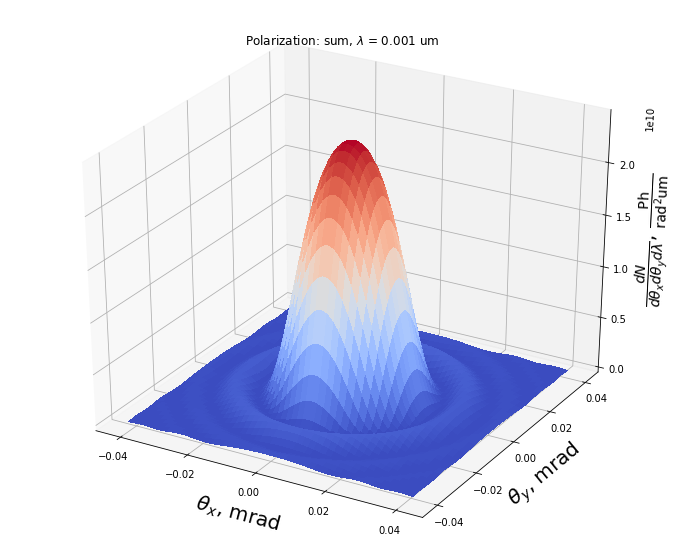

In [61]:
wr_sim.show_angular_distribution(index_of_lambda=14)

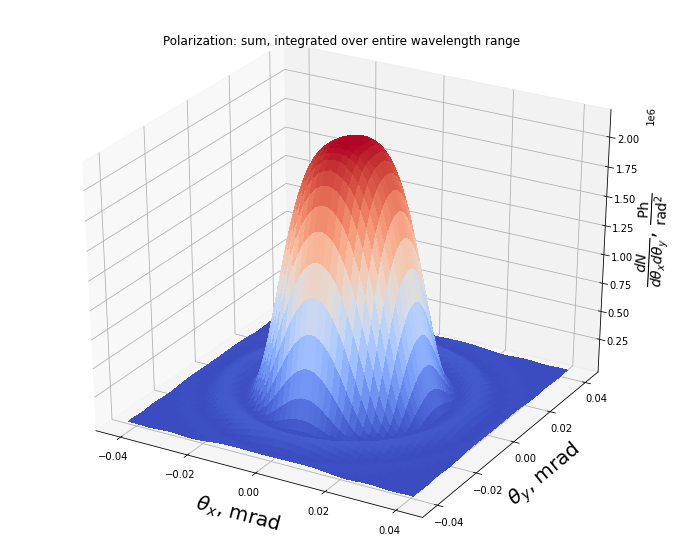

In [62]:
wr_sim.show_angular_distribution(polarization='sum')

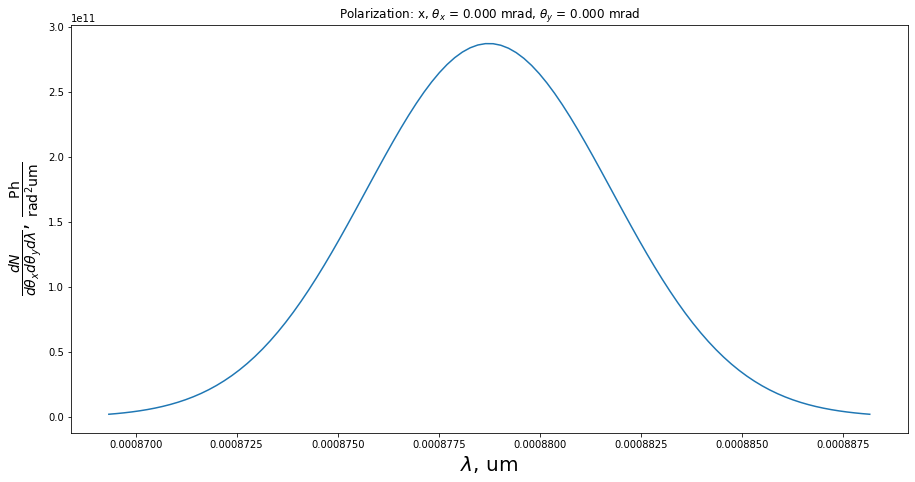

In [63]:
wr_sim.show_spectral_distribution(polarization='x', angular_indexes_tuple=(400,400))

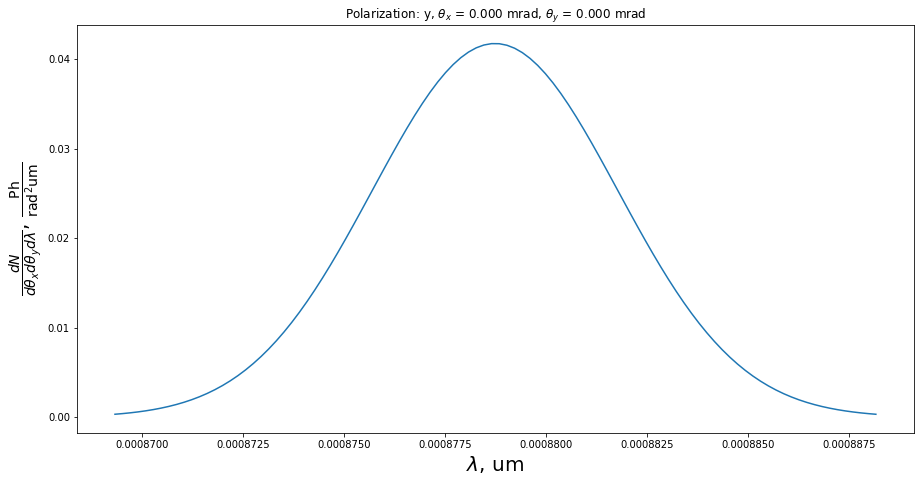

In [64]:
wr_sim.show_spectral_distribution(polarization='y', angular_indexes_tuple=(400,400))

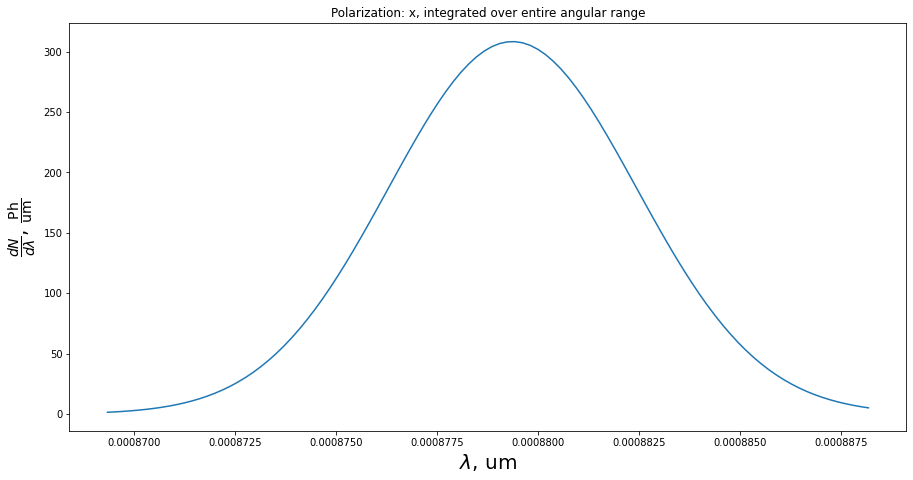

In [65]:
wr_sim.show_spectral_distribution(polarization='x')

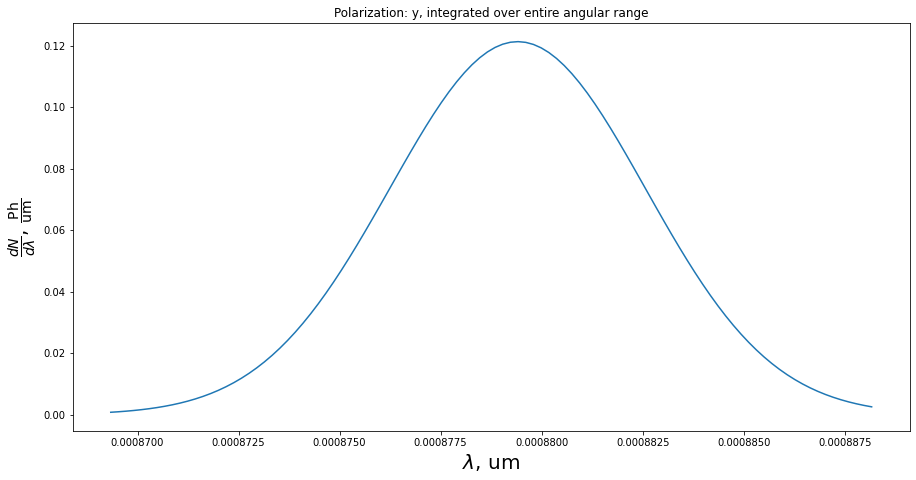

In [66]:
wr_sim.show_spectral_distribution(polarization='y')

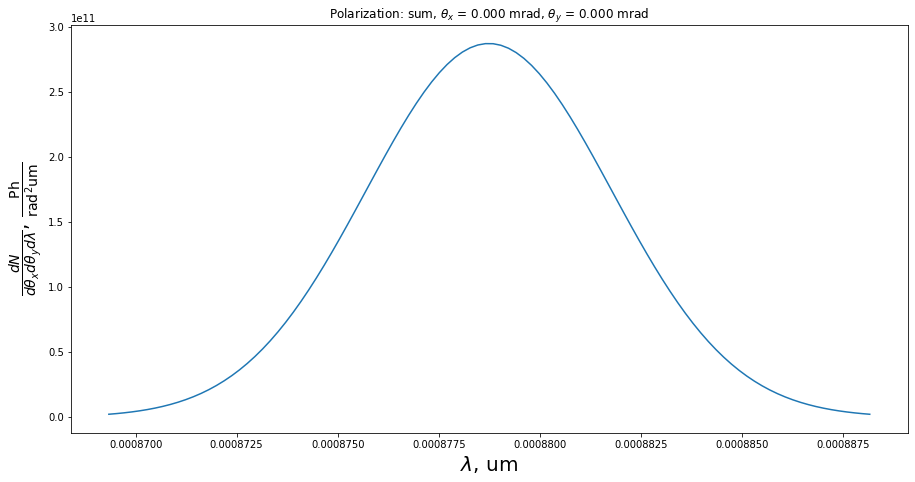

In [67]:
wr_sim.show_spectral_distribution(angular_indexes_tuple=(400,400))

The result below coincides with the SRW result, shown in Fig. 7 in https://arxiv.org/pdf/1912.06737.pdf 

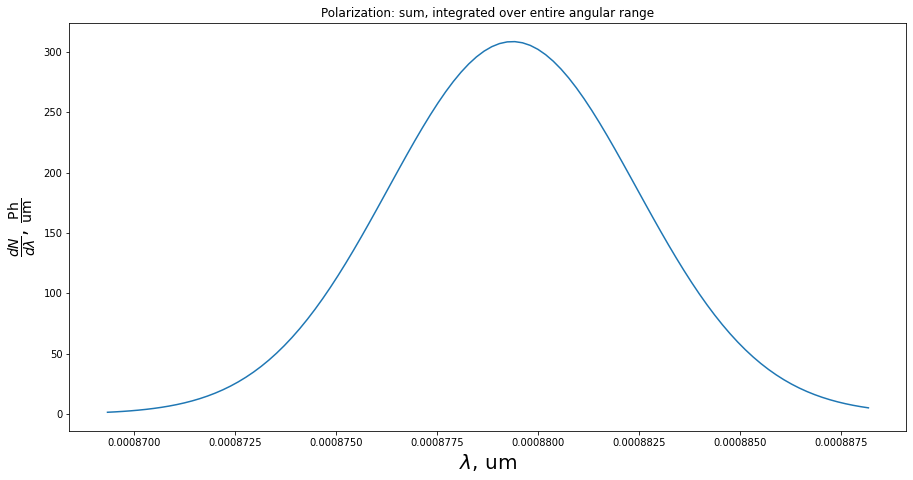

In [68]:
wr_sim.show_spectral_distribution(polarization='sum')

In [69]:
wr_sim.get_total_photon_flux(polarization='x')

0.0023677530133674836

In [70]:
wr_sim.get_total_photon_flux(polarization='y')

9.58764495632452e-07

In [71]:
wr_sim.get_total_photon_flux(polarization='sum')

0.0023687117778631163

In [75]:
0.002368*1.2e11

284160000.0

In [72]:
np.sum(wr_sim.get_amplittude_3D(polarization='x')**2-wr_sim.get_photon_flux_3D(polarization='x'))

0.0

In [73]:
np.sum(wr_sim.get_amplittude_3D(polarization='y')**2-wr_sim.get_photon_flux_3D(polarization='y'))

0.0

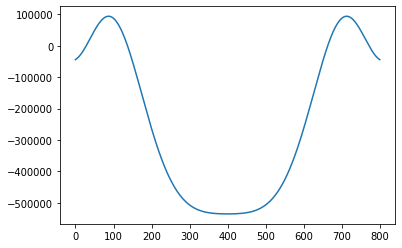

In [74]:
import matplotlib.pyplot as plt
plt.plot(wr_sim.get_amplittude_3D(polarization='x')[50,400,:])